In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = yf.download(a, start = '1995-1-1')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2025-08-21,158.729996,6370.169922
2025-08-22,158.669998,6466.910156
2025-08-25,156.149994,6439.319824
2025-08-26,155.970001,6465.939941
2025-08-27,156.960007,6481.399902


In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10,5))

<Axes: xlabel='Date'>

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
log_returns.mean() *250

PG       0.099432
^GSPC    0.085799
dtype: float64

In [7]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.048457,0.019643
^GSPC,0.019643,0.035597


In [8]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.472955
^GSPC,0.472955,1.000000


In [9]:
num_assets = len(assets)
num_assets

2

In [10]:
arr = np.random.random(2)
arr

array([0.47163662, 0.03803735])

In [11]:
(arr[0] + arr[1]).item()

0.5096739680652271

In [12]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.55315457, 0.44684543])

In [13]:
(weights[0] + weights[1]).item()

1.0

In [14]:
#EXPECTED PORTFOLIO RETURN

In [15]:
(np.sum(weights * log_returns.mean()) * 250).item()

0.09333995679623489

In [16]:
#EXPECTED PORTFOLIO VARIANCE

In [17]:
(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))).item()

0.03164504895548127

In [18]:
#EXPECTED PORTFOLIO VOLATILITY

In [19]:
(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))).item()

0.1778905533059057

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250 , weights))))

pfolio_returns, pfolio_volatilities

([np.float64(0.09907905854058056),
  np.float64(0.09356674186201092),
  np.float64(0.09183511896802585),
  np.float64(0.09041870130111332),
  np.float64(0.09346054482705188),
  np.float64(0.09294506078782487),
  np.float64(0.09392857034172311),
  np.float64(0.09663037015214683),
  np.float64(0.08957563919714333),
  np.float64(0.0924667426891248),
  np.float64(0.09513260858148695),
  np.float64(0.09444408051383427),
  np.float64(0.09897222390183671),
  np.float64(0.09036363104500955),
  np.float64(0.09089620746849753),
  np.float64(0.09169647866000162),
  np.float64(0.09114984217792847),
  np.float64(0.08748046493920189),
  np.float64(0.08922496989937657),
  np.float64(0.09200685246300648),
  np.float64(0.08844726138401547),
  np.float64(0.09465472191890802),
  np.float64(0.09145029904614373),
  np.float64(0.09390997706617384),
  np.float64(0.09434588141077443),
  np.float64(0.09001414384075956),
  np.float64(0.09254225930594874),
  np.float64(0.08805930032488603),
  np.float64(0.097789

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250 , weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09662881, 0.08638337, 0.08864926, 0.08706252, 0.09862565,
        0.08908147, 0.08596452, 0.09112035, 0.09033926, 0.09295141,
        0.08757575, 0.09155834, 0.08986142, 0.08748059, 0.09071864,
        0.09297365, 0.09188881, 0.09110731, 0.08760562, 0.08592038,
        0.08982389, 0.08874138, 0.09381808, 0.09277853, 0.0937117 ,
        0.09073134, 0.09382481, 0.09463832, 0.09136965, 0.09899539,
        0.09612729, 0.08873576, 0.08809191, 0.09168792, 0.08922457,
        0.09214039, 0.0931481 , 0.09264102, 0.09224191, 0.09656661,
        0.09400209, 0.0907652 , 0.0926213 , 0.09685601, 0.09425336,
        0.08812803, 0.0952902 , 0.09680315, 0.09202416, 0.08822253,
        0.09292443, 0.09824881, 0.09224844, 0.09190272, 0.09580451,
        0.09391461, 0.09334095, 0.09407952, 0.09547664, 0.09108547,
        0.09100434, 0.09533697, 0.09121073, 0.09116955, 0.09859467,
        0.09346535, 0.08620208, 0.08939304, 0.08836239, 0.08870929,
        0.09217082, 0.08873768, 0.09653931, 0.09

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'volatility': pfolio_volatilities})

In [23]:
portfolios.head()

,Return,volatility
0,0.096629,0.196216
1,0.086383,0.185232
2,0.088649,0.175734
3,0.087063,0.181725
4,0.098626,0.212615


In [24]:
portfolios.tail()

,Return,volatility
995,0.095759,0.190215
996,0.093429,0.178217
997,0.092653,0.175701
998,0.093986,0.180499
999,0.093732,0.179411


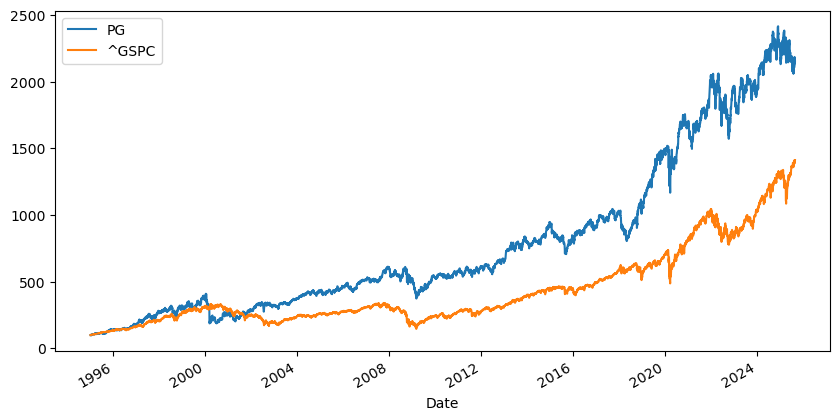

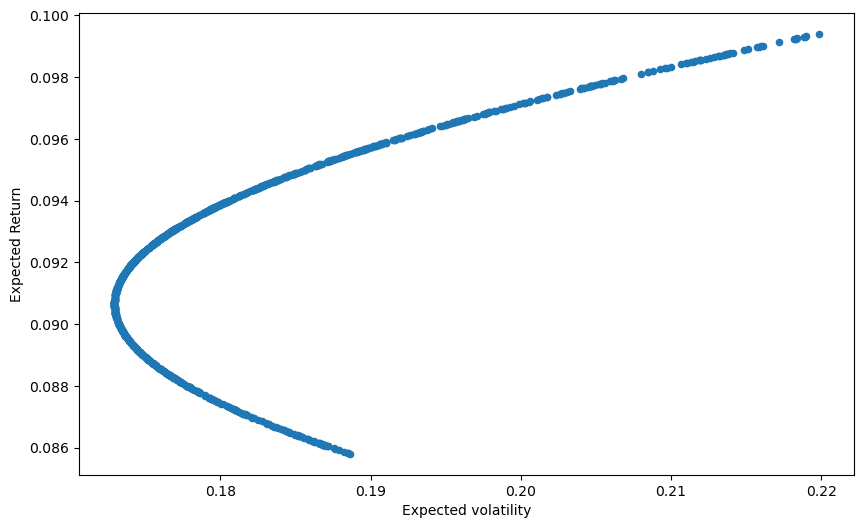

In [25]:
portfolios.plot(x = 'volatility', y='Return', kind = 'scatter', figsize = (10,6));
plt.xlabel('Expected volatility')
plt.ylabel('Expected Return')
plt.show()